In [59]:
from fastai.imports import *
from fastai import *
import pandas as pd
import numpy as np
from fastai import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [60]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin'] 
raw_dataset = pd.read_csv('auto-mpg.data', names=column_names, comment='\t', sep=" ", skipinitialspace=True) 
df_all = raw_dataset.copy()  # just to keep the raw data intact
df_all.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1


In [61]:
# types = {'id': 'int64',
#          'item_nbr': 'int32',
#          'store_nbr': 'int8',
#          'unit_sales': 'float32',
#          'onpromotion': 'object'}
# %%time
# df_all = pd.read_csv(f'{PATH}train.csv', parse_dates=['date'], 
#                      dtype=types, infer_datetime_format=True)
#this is the code which is used in class,because this datset is very big, 
#if we can format the data smaller, the speed will ne faster

In [62]:
df_all.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [63]:
# df_all.onpromotion.fillna(False, inplace=True)
# df_all.onpromotion = df_all.onpromotion.map({'False': False,'True': True})
# df_all.onpromotion = df_all.onpromotion.astype(bool)
# %time df_all.to_feather('tmp/raw_groceries')

fillna(False): we would not do this without checking first, but some exploratory data analysis shows that it is probably an appropriate thing to do (i.e. missing means false).
map({‘False’: False, ‘True’: True}) : object usually reads in as string, so replace string ‘True’ and ‘False’ with actual booleans.
astype(bool) : Then finally convert it to boolean type

In [64]:
df_all.describe(include='all')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000


In [65]:
df_all[df_all.Horsepower == '?']

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,?,2046.0,19.0,71,1
126,21.0,6,200.0,?,2875.0,17.0,74,1
330,40.9,4,85.0,?,1835.0,17.3,80,2
336,23.6,4,140.0,?,2905.0,14.3,80,1
354,34.5,4,100.0,?,2320.0,15.8,81,2
374,23.0,4,151.0,?,3035.0,20.5,82,1


In [66]:
# fix missing value

In [67]:
median = df_all.Horsepower[df_all.Horsepower != '?'].median()
median

93.5

In [68]:
df_all.replace('?', median,inplace=True)
df_all.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [69]:
df_all

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [70]:
# df_all.unit_sales = np.log1p(np.clip(df_all.unit_sales, 0, None))
# if they want root mean squared log error, we need to do this for the y.

# train model

In [71]:
y = df_all.MPG
x = df_all.loc[:,df_all.columns != 'MPG']

In [72]:
### split train set and test set 
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y, random_state=66, test_size=0.2)

In [73]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(x_train), y_train),
           rmse(m.predict(x_val), y_val),
           m.score(x_train, y_train), m.score(x_val, y_val)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [74]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1,min_samples_leaf=3,max_features = 0.5,oob_score = True)
m.fit(x_train, y_train)
print_score(m)

[1.9711258760585209, 2.499506786120117, 0.9388617674271749, 0.8740262680993076, 0.8609243764002441]


In [75]:
# So the standard deviation of the predictions across the trees gives us at least 
# relative understanding of how confident we are of this prediction 
%time preds = np.stack([t.predict(x_val) for t in m.estimators_])
preds.shape
preds[:,0]
np.mean(preds[:,0]),np.std(preds[:,0])

CPU times: user 46.2 ms, sys: 2.37 ms, total: 48.6 ms
Wall time: 47.4 ms


(13.204095418470416, 0.9686736624892627)

In [76]:
# for t in m.estimators_:
#     print(t)
#     print(t.predict(x_val))

# Feature importance

I always look at feature importance first in practice. Whether I’m working on a Kaggle competition or a real world project, I build a random forest as fast as I can, trying to get it to the point that is significantly better than random but doesn’t have to be much better than that. And the next thing I do is to plot the feature importance.

In [83]:
m.feature_importances_

array([0.21461728, 0.28009544, 0.15686975, 0.19784473, 0.02587177,
       0.11742096, 0.00728007])

In [84]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [86]:
fi = rf_feat_importance(m,x_train)
fi

,cols,imp
1,Displacement,0.280095
0,Cylinders,0.214617
3,Weight,0.197845
2,Horsepower,0.156870
5,Model Year,0.117421
4,Acceleration,0.025872
6,Origin,0.007280


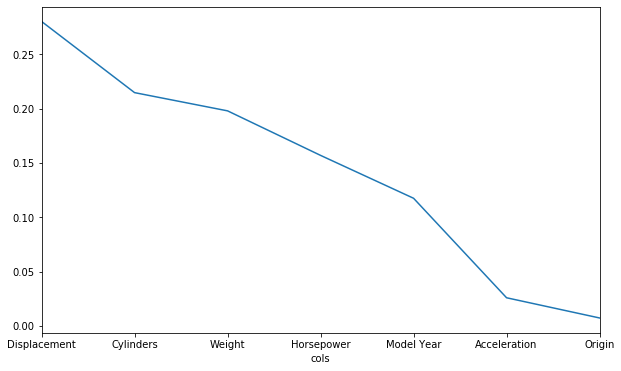

In [87]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

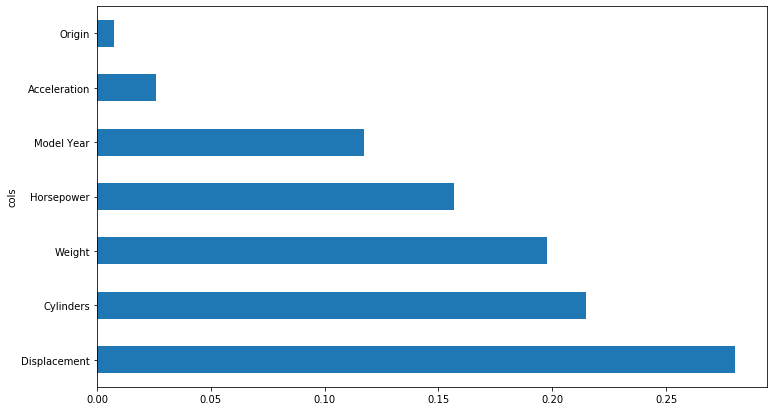

In [88]:
fi.plot('cols','imp','barh', figsize=(12,7), legend=False)

To make life easier, it is sometimes good to throw some data away and see if it make any difference. In this case, we have a random forest which was .889 r². Here we filter out those where the importance is equal to or less than 0.005 (i.e. only keep the one whose importance is greater than 0.005).

In [90]:
# to_keep = fi[fi.imp>0.005].cols; len(to_keep)
# df_keep = df_all[to_keep].copy()

In [92]:
x_train, x_val,y_train,y_val = train_test_split(x,y, random_state=99, test_size=0.2)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, 
                       max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x_train, y_train)
print_score(m)

[1.861608653091678, 3.1984298810140936, 0.9428747727367783, 0.8349476662489957, 0.8685750649329286]


because this dataset I used is small, it doesn't have many features.For those who has many features, pick some more important fatures will increase the accuracy